In [1]:
import pandas as pd
cfb = pd.read_csv('cfb_combined.csv')

In [2]:
#Predict team by year within conference

print(cfb['Conference'].unique())
for conf in cfb['Conference'].unique():
    print(f'{conf} has {len(cfb[cfb["Conference"] == conf]["Team"].unique())} teams')

# Will first look at Big12, as they require a smaller # of clusters (not every independent team is listed as independent for each year in data set, so ind. data is incomplete)

['MAC' 'SEC' 'Pac-12' 'SunBelt' 'Independent' 'Big12' 'ACC' 'AAC' 'C-USA'
 'BigTen' 'MWC']
MAC has 13 teams
SEC has 14 teams
Pac-12 has 12 teams
SunBelt has 16 teams
Independent has 8 teams
Big12 has 10 teams
ACC has 16 teams
AAC has 14 teams
C-USA has 17 teams
BigTen has 14 teams
MWC has 12 teams


In [3]:
big12 = cfb[cfb['Conference'] == 'Big12']

team = big12['Team']
num = big12.columns.drop(['Team','Conference','Average.Time.of.Possession.per.Game','Time.of.Possession'])

data = big12[num].sample(n=70,axis=1,random_state=1)
data['Team'] = team

c:\Users\ztjoh\anaconda3\lib\site-packages\sklearn\pipeline.py:346: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\ztjoh\anaconda3\lib\site-packages\sklearn\pipeline.py:346: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\ztjoh\anaconda3\lib\site-packages\sklearn\pipeline.py:346: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\ztjoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wit

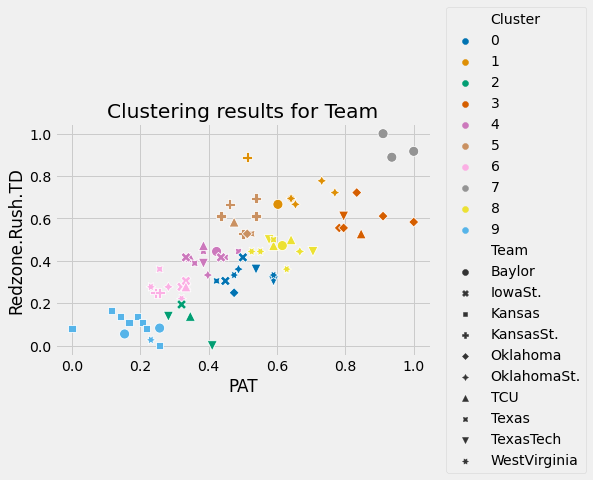

silhouette score is: 0.40628777912821085, rand score: 0.19321516609930742


In [4]:
from cluster import cluster_analysis_2d

cluster_analysis_2d(data,'Team')

Rand score is not very high, but clear trends can be seen. Of note, Baylor has three data points closely clustered together, but the rest are very far away. Texas Tech and TCU are all over the place. 

c:\Users\ztjoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


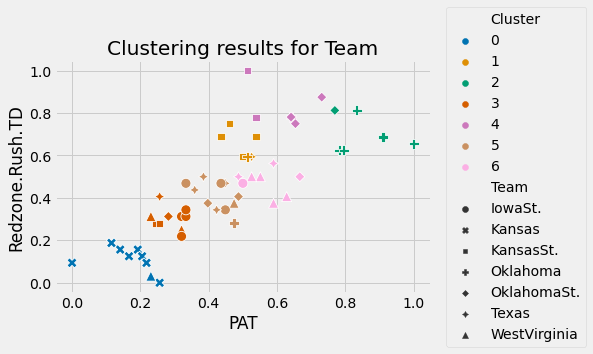

silhouette score is: 0.3975057447673978, rand score: 0.2637862421830586


In [5]:
new_data = data.loc[(data['Team'] != 'TexasTech') & (data['Team'] != 'TCU') & (data['Team'] != 'Baylor')]
new_data= new_data[['Team','PAT','Redzone.Rush.TD']]
cluster_analysis_2d(new_data,'Team')

Better rand score, but still room for improvement. Lots of overlapping clusters. Still, there is a definite trend shown. Can see where ideal centroids would go, but they do not align with minimization of distance between points. 

c:\Users\ztjoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


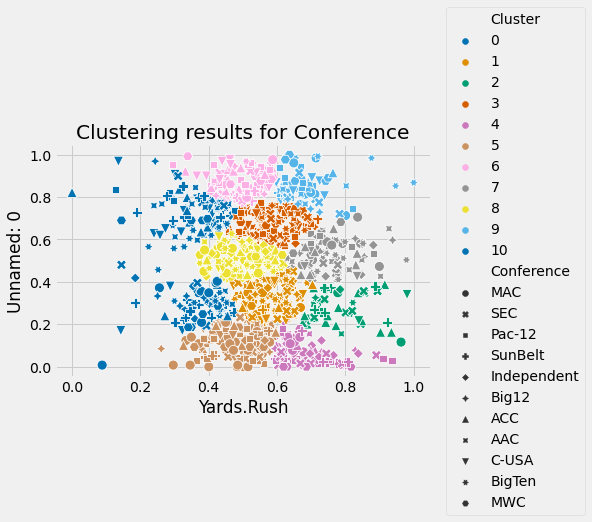

silhouette score is: 0.34185647576984474, rand score: 0.0348950187227609


In [7]:
# Can we predict Conference?

conference = cfb['Conference']
data = cfb[num].sample(n=50,axis=1,random_state=15)
data['Conference'] = conference

cluster_analysis_2d(data,'Conference')


Nothing here, too much data and too close together. No clear clusters, and data within conference is very spread out.

c:\Users\ztjoh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


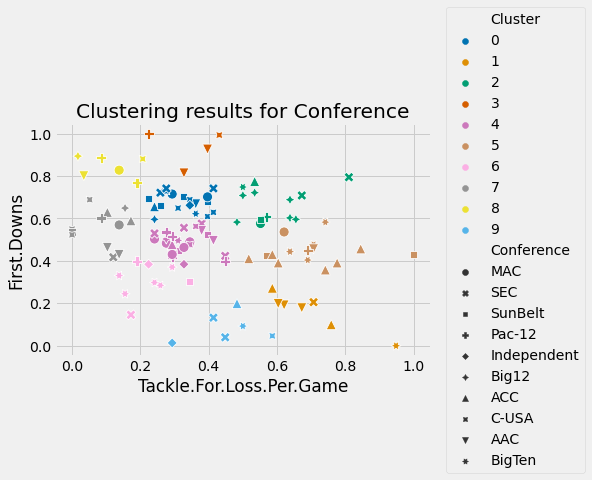

silhouette score is: 0.39467552220814717, rand score: 0.05222350693803837


In [8]:
# Look at single year
data = cfb[cfb['Year']==2016]
conference = data['Conference']
data = data[num].sample(n=50,axis=1,random_state=15)
data['Conference'] = conference

cluster_analysis_2d(data,'Conference')

Low rand score, not much but can see groupings where conferences are the same (AAC, Big12, BigTen). However, whole conference does not adhere to rule. 